In [7]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import optuna

d:\Tutorials\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# Generate some sample data
np.random.seed(0)
X = np.random.randn(100, 10)
y = X @ np.random.randn(10) + np.random.randn(100)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the objective function for hyperparameter optimization
def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Perform hyperparameter optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Train the final model with the best hyperparameters
best_alpha = study.best_params['alpha']
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

print(f"Best Alpha: {best_alpha}")
print(f"Mean Squared Error: {mse}")
print(f"Coefficients: {lasso.coef_}")

[I 2024-07-01 12:20:11,733] A new study created in memory with name: no-name-3f3828c0-a367-45a8-8c0a-430ee1137b22
C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_20220\3876116154.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
[I 2024-07-01 12:20:11,751] Trial 0 finished with value: 1.1752196244448279 and parameters: {'alpha': 0.009630774069193875}. Best is trial 0 with value: 1.1752196244448279.


C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_20220\3876116154.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
[I 2024-07-01 12:20:11,757] Trial 1 finished with value: 1.17888908613139 and parameters: {'alpha': 0.01439323470340351}. Best is trial 0 with value: 1.1752196244448279.
C:\Users\ropar_i9941t3\AppData\Local\Temp\ipykernel_20220\3876116154.py:11: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-4, 1e1)
[I 2024-07-01 12:20:11,765] Trial 2 finished with value: 1.790500472275141 and parameters: {'alpha': 0.720578232927043}. Best is trial 0 with value: 1.1752196

Best Alpha: 0.00010000368477482492
Mean Squared Error: 1.1693739988891756
Coefficients: [ 0.72042786  0.72930548 -0.45868966  0.10451563  0.36797436  0.23900736
  0.56515584 -1.85848649 -0.10493782  0.16267196]


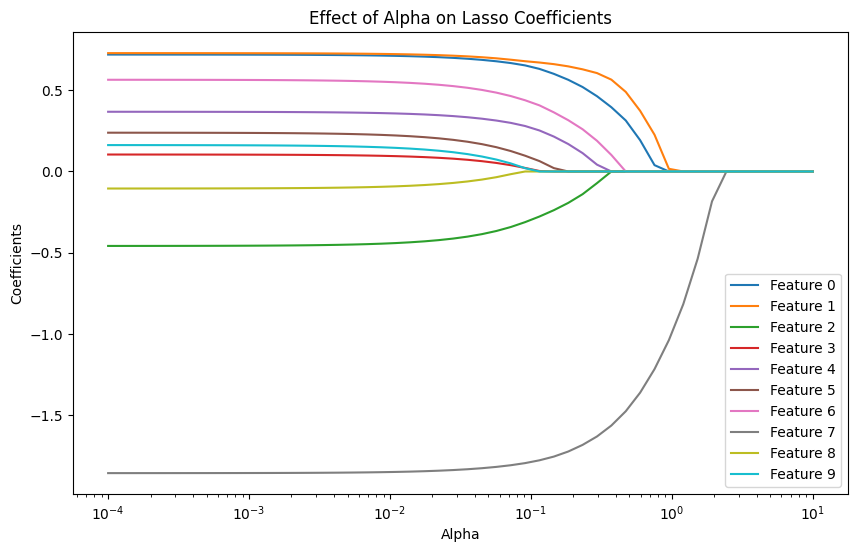

In [4]:
import matplotlib.pyplot as plt

# Define a range of alpha values
alphas = np.logspace(-4, 1, 50)

# Store the coefficients for each alpha value
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Plot the effect of alpha on the coefficients
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Effect of Alpha on Lasso Coefficients')
plt.legend([f'Feature {i}' for i in range(X.shape[1])], loc='best')
plt.show()